In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random 

In [11]:
train_dir = r"C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\1_Datasets\Train"
test_dir = r"C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\1_Datasets\Test"
valid_dir = r"C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\1_Datasets\Validation"
train_dir_augmented = r"C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\1_Datasets\Train_augmented"

# Setup data inputs
IMG_SIZE = 144

#import data from directory
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                label_mode = "categorical",
                                                                image_size = (IMG_SIZE, IMG_SIZE),
                                                                shuffle = True,
                                                                seed = 42)

train_data_augmented = tf.keras.preprocessing.image_dataset_from_directory(train_dir_augmented,
                                                                label_mode = "categorical",
                                                                image_size = (IMG_SIZE, IMG_SIZE),
                                                                shuffle = True,
                                                                seed = 42)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = "categorical",
                                                                image_size = (IMG_SIZE, IMG_SIZE),
                                                                shuffle = False) # don't shuffle test data for prediction analysis

valid_data = tf.keras.preprocessing.image_dataset_from_directory(valid_dir,
                                                                label_mode = "categorical",
                                                                image_size = (IMG_SIZE, IMG_SIZE),
                                                                shuffle = False) # don't shuffle test data for prediction analysis
train_data

Found 19173 files belonging to 7 classes.
Found 23846 files belonging to 7 classes.
Found 2030 files belonging to 7 classes.
Found 2030 files belonging to 7 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 144, 144, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))>

In [12]:
train_dir = r"C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\1_Datasets\Train"
test_dir = r"C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\1_Datasets\Test"
valid_dir = r"C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\1_Datasets\Validation"
train_dir_augmented = r"C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\1_Datasets\Train_augmented"

# Setup data inputs
IMG_SIZE = 128

#import data from directory
train_data_1 = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                label_mode = "categorical",
                                                                image_size = (IMG_SIZE, IMG_SIZE),
                                                                shuffle = True,
                                                                seed = 42)

train_data_augmented_1 = tf.keras.preprocessing.image_dataset_from_directory(train_dir_augmented,
                                                                label_mode = "categorical",
                                                                image_size = (IMG_SIZE, IMG_SIZE),
                                                                shuffle = True,
                                                                seed = 42)

test_data_1 = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = "categorical",
                                                                image_size = (IMG_SIZE, IMG_SIZE),
                                                                shuffle = False) # don't shuffle test data for prediction analysis

valid_data_1 = tf.keras.preprocessing.image_dataset_from_directory(valid_dir,
                                                                label_mode = "categorical",
                                                                image_size = (IMG_SIZE, IMG_SIZE),
                                                                shuffle = False) # don't shuffle test data for prediction analysis


Found 19173 files belonging to 7 classes.
Found 23846 files belonging to 7 classes.
Found 2030 files belonging to 7 classes.
Found 2030 files belonging to 7 classes.


In [36]:
class_names = train_data.class_names
class_names

['Atelectasis',
 'Effusion',
 'Infiltration',
 'Mass',
 'No_finding',
 'Nodule',
 'Pneumothorax']

## Preprocessing the dataset

In [37]:
#Creating a function to preprocess the images
def preprocess_img(image, label):
  """
  Converts image datatype from 'uint8' -> 'float32' and adds 2 copys of it 
  """
  image = tf.cast(image, tf.float32)
  return (image, image, image), label 

In [38]:
# Map preprocessing function to training data (and paralellize)
train_data = train_data.map(map_func = preprocess_img, num_parallel_calls = tf.data.AUTOTUNE) 
train_data = train_data.prefetch(buffer_size=tf.data.AUTOTUNE)

# Map prepreprocessing function to test data
test_data = test_data.map(map_func = preprocess_img, num_parallel_calls= tf.data.AUTOTUNE)
test_data = test_data.prefetch(buffer_size = tf.data.AUTOTUNE)

# Map prepreprocessing function to validation data
valid_data = valid_data.map(map_func = preprocess_img, num_parallel_calls= tf.data.AUTOTUNE)
valid_data = valid_data.prefetch(buffer_size = tf.data.AUTOTUNE)

# Map prepreprocessing function to augmented training data
train_data_augmented = train_data_augmented.map(map_func = preprocess_img, num_parallel_calls= tf.data.AUTOTUNE)
train_data_augmented = train_data_augmented.prefetch(buffer_size = tf.data.AUTOTUNE)

train_data_augmented

<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None)), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))>

# Create checkpoint callback

In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath='ensemble_best_model.h5',
    save_weights_only=False,  
    monitor='val_accuracy',  
    save_best_only=True, 
    verbose=1  
)

# Create ensemble model

In [7]:
# Load models
model_1 = tf.keras.models.load_model(r"C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\6_saved_models\fine_tuning_best_model_AVG_2.h5")
model_2 = tf.keras.models.load_model(r"C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\6_saved_models\fine_tuning_best_model_maxpool.h5")
model_3 = tf.keras.models.load_model(r"C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\6_saved_models\fine_tuning_best_model.h5")
model_1.trainable = False
model_2.trainable = False
model_3.trainable = False

#renaming input layers
for i, modello in enumerate([model_1, model_2, model_3]):
    num_layer = f'{i+1}'
    for layer in modello.layers:
        layer._name = layer.name + '_' + num_layer
    print(modello.layers)

[<keras.engine.input_layer.InputLayer object at 0x00000133472FD590>, <keras.layers.preprocessing.image_preprocessing.RandomFlip object at 0x00000133460EB310>, <keras.layers.preprocessing.image_preprocessing.RandomBrightness object at 0x0000013346060610>, <keras.layers.preprocessing.image_preprocessing.RandomContrast object at 0x0000013347BEF490>, <keras.engine.functional.Functional object at 0x000001334CB75C50>, <keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x000001334CC00E10>, <keras.layers.core.dense.Dense object at 0x000001334CBF5510>]
[<keras.engine.input_layer.InputLayer object at 0x0000013354EA7FD0>, <keras.layers.preprocessing.image_preprocessing.RandomFlip object at 0x000001334EF6C950>, <keras.layers.preprocessing.image_preprocessing.RandomBrightness object at 0x000001334C934FD0>, <keras.layers.preprocessing.image_preprocessing.RandomContrast object at 0x000001334EF1B550>, <keras.engine.functional.Functional object at 0x000001336B28C110>, <kera

In [8]:
from tensorflow.keras import layers

# concatenating the models
ensemble_layer = layers.Concatenate(name="ensemble_concat")([ model_1.output, model_2.output, model_3.output])
x = layers.Dense(32, activation='relu')(ensemble_layer)
x = layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)

# creating the model
ensemble_model = tf.keras.Model(
    inputs=[model_1.input, model_2.input, model_3.input],
    outputs=outputs,
    name='ensemble_model'
)

#compile the model
ensemble_model.compile(
                            optimizer = tf.keras.optimizers.Adam(), 
                            loss = tf.keras.losses.categorical_crossentropy,
                            metrics = ['accuracy']
    )

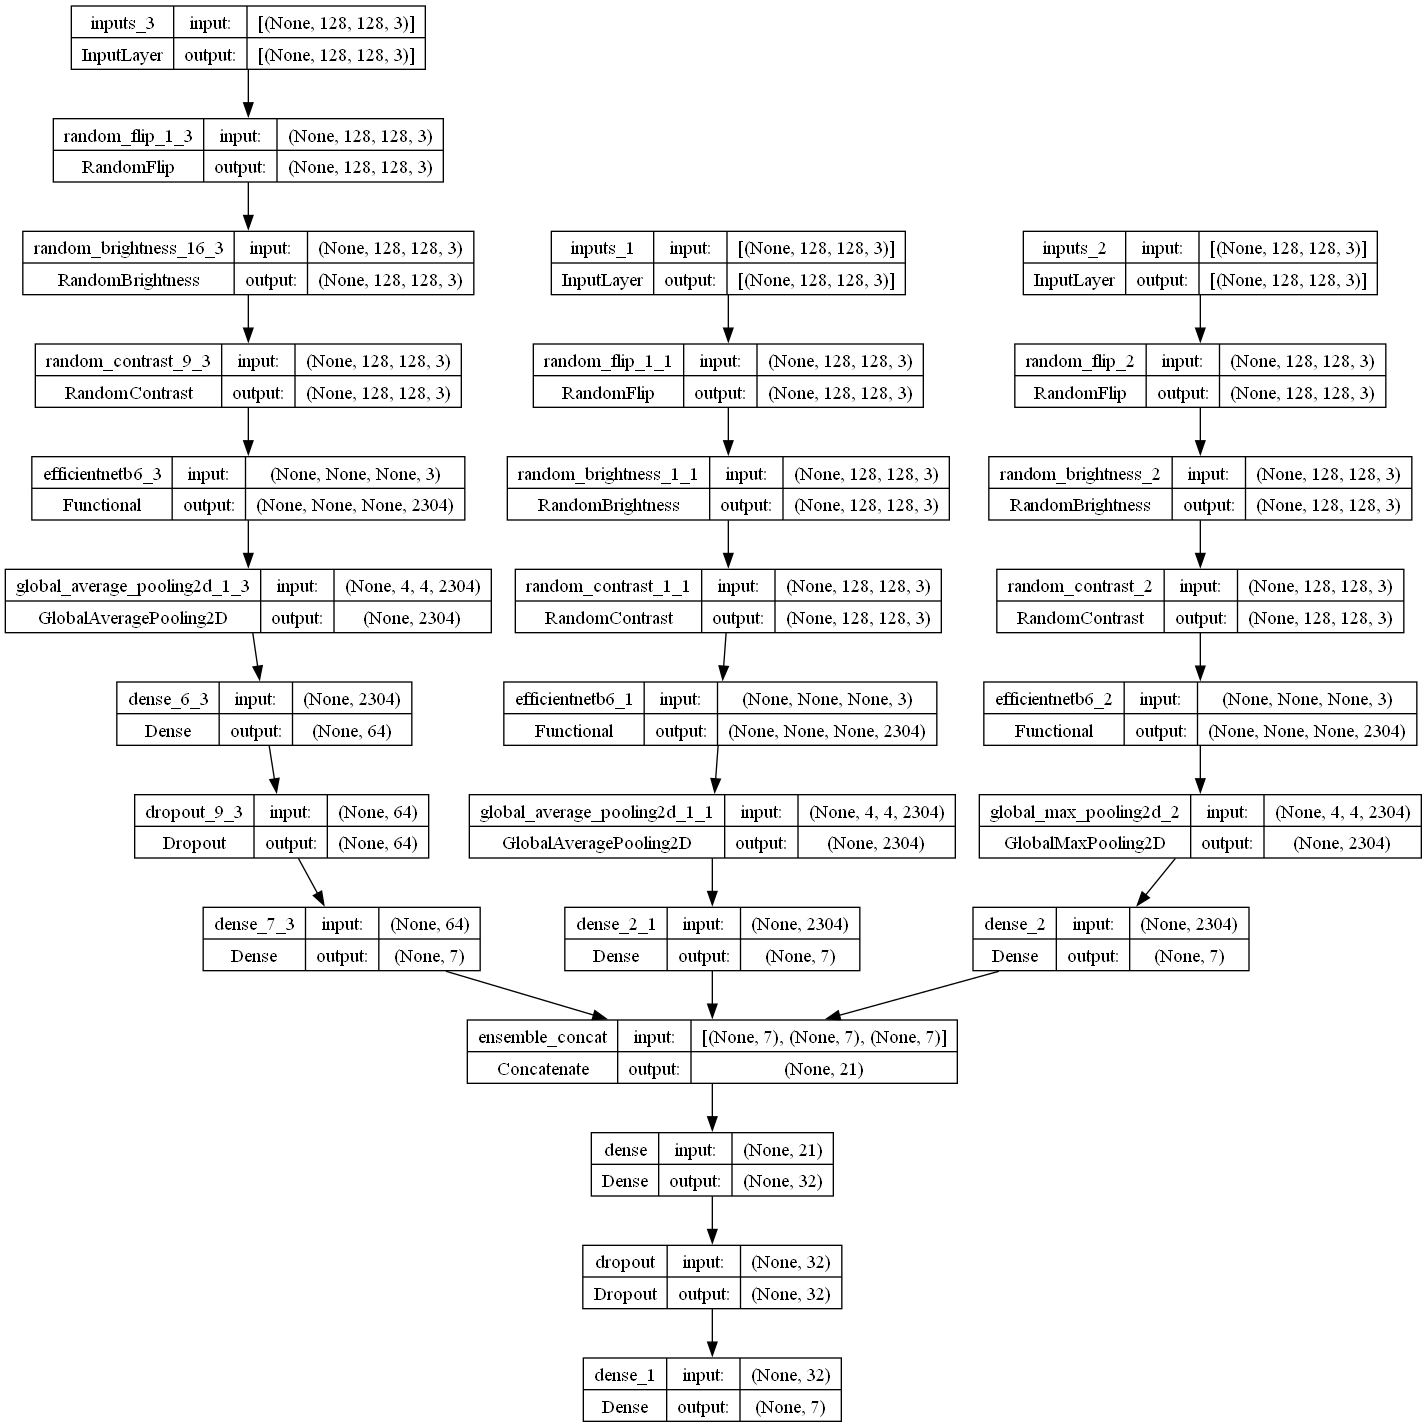

In [9]:
from tensorflow.keras.utils import plot_model

plot_model(ensemble_model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [10]:
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)
  
history_fine_tuning = ensemble_model.fit(
                                    train_data_augmented,
                                    epochs=8,
                                    validation_data=valid_data,
                                    validation_steps=len(valid_data),
                                    callbacks=[checkpoint_callback]
)

Epoch 1/8
 28/746 [>.............................] - ETA: 43:51 - loss: 1.9057 - accuracy: 0.2422

KeyboardInterrupt: 

# Evaluate

In [50]:
ensemble_model = tf.keras.models.load_model(r"C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\6_saved_models\ensemble_best_model_2.h5")
ensemble_model.evaluate(test_data)

64/64 [==============================] - 261s 4s/step - loss: 1.8312 - accuracy: 0.3517


[1.831188440322876, 0.35172414779663086]

# Using best predictions

In [3]:
model_1 = tf.keras.models.load_model(r"C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\6_saved_models\fine_tuning_best_model_AVG_2.h5")
model_3 = tf.keras.models.load_model(r"C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\6_saved_models\fine_tuning_best_model_144p.h5")

In [13]:
from sklearn.metrics import accuracy_score

valid_pred_probs_1 = model_1.predict(valid_data_1)
valid_pred_probs_3 = model_3.predict(valid_data)
valid_pred_1 = np.array(tf.argmax(valid_pred_probs_1, axis=1))
valid_pred_3 = np.array(tf.argmax(valid_pred_probs_3, axis=1))

valid_pred = []
for i in range(len(valid_pred_1)):
    if valid_pred_1[i] == 4:
        valid_pred.append(valid_pred_1[i])
    else:
        valid_pred.append(valid_pred_3[i])

valid_label = []
for img, label in valid_data.unbatch():
    valid_label.append(tf.argmax(label).numpy())

accuracy_score(valid_label, valid_pred)


64/64 [==============================] - 101s 2s/step


0.3748768472906404

In [14]:
from sklearn.metrics import accuracy_score

test_pred_probs_1 = model_1.predict(test_data_1)
test_pred_probs_2 = model_3.predict(test_data)
test_pred_1 = np.array(tf.argmax(test_pred_probs_1, axis=1))
test_pred_2 = np.array(tf.argmax(test_pred_probs_2, axis=1))

64/64 [==============================] - 105s 2s/step


In [15]:
test_pred = []
for i in range(len(test_pred_2)):
    if test_pred_1[i] in [0,1]:
        test_pred.append(test_pred_2[i])
    else:
        test_pred.append(test_pred_1[i])

test_label = []
for img, label in test_data.unbatch():
    test_label.append(tf.argmax(label).numpy())

accuracy_score(test_label, test_pred)

0.3536945812807882